In [ ]:
  pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Box
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import random

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<ipython-input-2-e8a809440d8a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# load depression datasets
dp = pd.read_csv("depression_pre.csv")
dp_post = pd.read_csv("depression_post.csv")

In [ ]:
# depression dataset - combine all
dp_all = dp.append(dp_post, ignore_index=True)

<ipython-input-50-47f5bcf9c06c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp_all = dp.append(dp_post, ignore_index=True)


In [ ]:
dp_all["Post Text"].replace('[removed]', "", inplace = True)
dp_all['Post Length'] = dp_all['Post Text'].str.len()
dp_all

,Unnamed: 0,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved,year,month,Post Length
0,0,"Anyone else feel like their ""fake depressed""?","it's stupid, but i always doubt the fact i hav...",7tk5tf,2196,0.99,156,2018-01-28 13:12:11,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,621.0
1,1,Why don't you talk to us?,My parents keep asking me this question.\nToda...,7rrkf1,1660,0.99,136,2018-01-20 17:05:18,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,537.0
2,2,An old man killed my only way of coping with d...,- be me\n- have chronic depression and social ...,7t7c0h,1641,0.98,107,2018-01-26 20:18:05,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,826.0
3,3,Anyone just want to take a break from life and...,"That's all I want. I wanna go to a park, lay o...",7qwvjs,1402,0.99,104,2018-01-17 00:06:20,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,163.0
4,4,I had to fill out one of those depression test...,And I scored in the 'severe' range. This lead ...,7oydlq,1299,0.99,96,2018-01-08 13:05:09,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,I can’t believe people are out here really liv...,Nobody’s life is perfect of course but fuck. H...,tnuq6t,1784,1.00,286,2022-03-25 18:14:13,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,311.0
796,2,I sometimes wish depression was as visible on ...,Just because I look okay doesn’t mean I’m not ...,tqdr6l,1338,1.00,58,2022-03-28 16:54:10,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,63.0
797,3,Staying awake to delay next day from coming,"Anyone else, instead of sleeping more when dep...",tlytvy,1211,1.00,125,2022-03-24 05:44:21,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,242.0
798,4,Sometimes i wish i could donate my life to som...,There are so many people in the world who want...,ttc7pn,1159,1.00,58,2022-03-31 23:02:58,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,207.0


In [ ]:
dp_arima = dp_all.drop(columns= ['Unnamed: 0', 'Title', 'Post Text', 'ID', 'Post URL', 'Original Content', 'Saved', 'year', 'month'])

In [ ]:
dp_arima

,Score,Upvote Ratio,Total Comments,Created On,Post Length
0,2196,0.99,156,2018-01-28 13:12:11,621.0
1,1660,0.99,136,2018-01-20 17:05:18,537.0
2,1641,0.98,107,2018-01-26 20:18:05,826.0
3,1402,0.99,104,2018-01-17 00:06:20,163.0
4,1299,0.99,96,2018-01-08 13:05:09,331.0
...,...,...,...,...,...
795,1784,1.00,286,2022-03-25 18:14:13,311.0
796,1338,1.00,58,2022-03-28 16:54:10,63.0
797,1211,1.00,125,2022-03-24 05:44:21,242.0
798,1159,1.00,58,2022-03-31 23:02:58,207.0


In [ ]:
#dp_arima.rename(columns={"Created On": "Date"})

In [ ]:
dp_arima['Created On'].dtypes

dtype('O')

In [ ]:
dp_arima['Created On'] = pd.to_datetime(dp_arima["Created On"])

In [ ]:
dp_arima['Date'] = dp_arima['Created On'].dt.date
dp_arima

,Score,Upvote Ratio,Total Comments,Created On,Post Length,Date
0,2196,0.99,156,2018-01-28 13:12:11,621.0,2018-01-28
1,1660,0.99,136,2018-01-20 17:05:18,537.0,2018-01-20
2,1641,0.98,107,2018-01-26 20:18:05,826.0,2018-01-26
3,1402,0.99,104,2018-01-17 00:06:20,163.0,2018-01-17
4,1299,0.99,96,2018-01-08 13:05:09,331.0,2018-01-08
...,...,...,...,...,...,...
795,1784,1.00,286,2022-03-25 18:14:13,311.0,2022-03-25
796,1338,1.00,58,2022-03-28 16:54:10,63.0,2022-03-28
797,1211,1.00,125,2022-03-24 05:44:21,242.0,2022-03-24
798,1159,1.00,58,2022-03-31 23:02:58,207.0,2022-03-31


In [ ]:
log_dp_arima = np.log(dp_arima['Post Length'])

<Axes: >

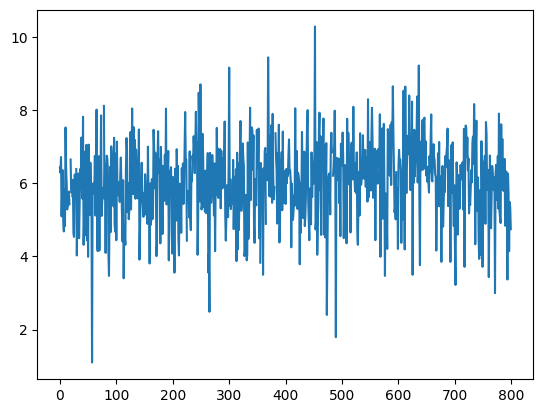

In [ ]:
log_dp_arima.plot(x = 'Date', y = 'Post Length')

In [ ]:
dp_arima

,Score,Upvote Ratio,Total Comments,Created On,Post Length,Date
0,2196,0.99,156,2018-01-28 13:12:11,621.0,2018-01-28
1,1660,0.99,136,2018-01-20 17:05:18,537.0,2018-01-20
2,1641,0.98,107,2018-01-26 20:18:05,826.0,2018-01-26
3,1402,0.99,104,2018-01-17 00:06:20,163.0,2018-01-17
4,1299,0.99,96,2018-01-08 13:05:09,331.0,2018-01-08
...,...,...,...,...,...,...
795,1784,1.00,286,2022-03-25 18:14:13,311.0,2022-03-25
796,1338,1.00,58,2022-03-28 16:54:10,63.0,2022-03-28
797,1211,1.00,125,2022-03-24 05:44:21,242.0,2022-03-24
798,1159,1.00,58,2022-03-31 23:02:58,207.0,2022-03-31


In [ ]:
msk = (log_dp_arima.index < len(log_dp_arima)-30)
df_train = log_dp_arima[msk].copy()
df_test = log_dp_arima[~msk].copy()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


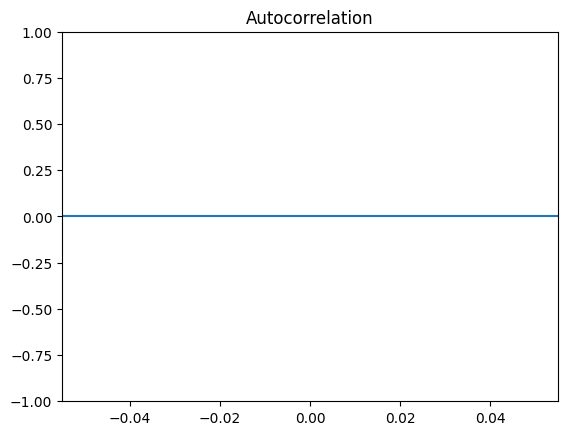

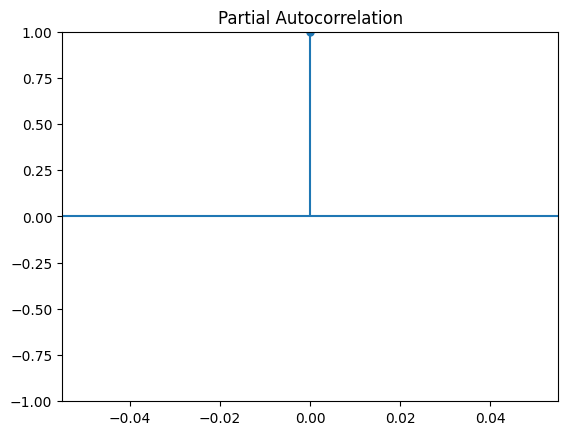

In [ ]:
acf_org = plot_acf(df_train)
pacf_org = plot_pacf(df_train)

<Axes: >

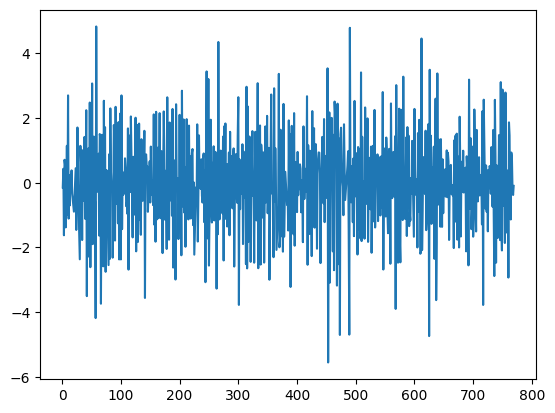

In [ ]:
train_diff = df_train.diff().dropna()
train_diff.plot()

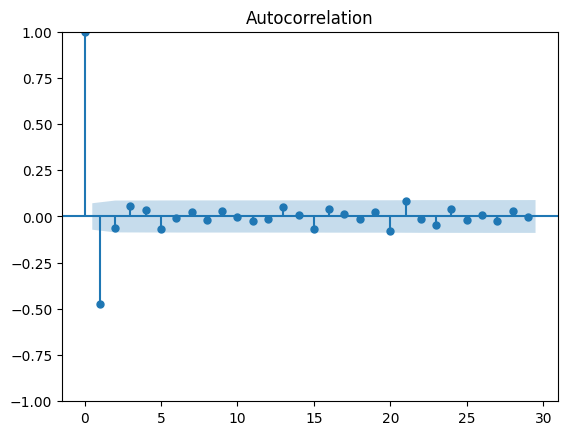

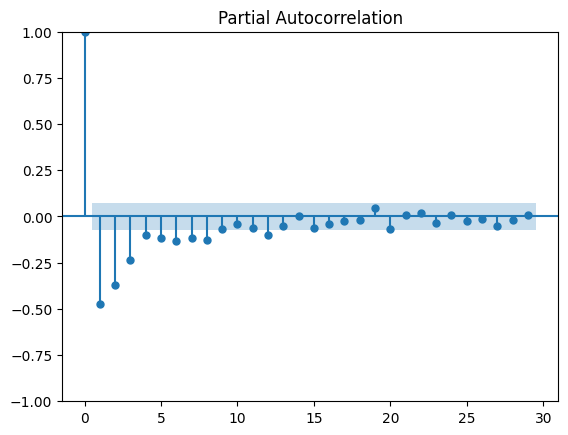

In [ ]:
acf_org = plot_acf(train_diff)
pacf_org = plot_pacf(train_diff)

In [ ]:
import statsmodels.tsa.stattools as adfuller
from socket import socket

In [ ]:
adf_test = adfuller.adfuller(train_diff)
print(f'pvalue: {adf_test[1]}')

pvalue: 1.5083108979267525e-22


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order = (2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Post Length   No. Observations:                  770
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1232.833
Date:                Wed, 20 Mar 2024   AIC                           2471.665
Time:                        21:57:39   BIC                           2485.600
Sample:                             0   HQIC                          2477.028
                                - 770                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6560      0.032    -20.446      0.000      -0.719      -0.593
ar.L2         -0.3611      0.035    -10.203      0.000      -0.430      -0.292
sigma2         1.5070      0.068     22.061      0.0

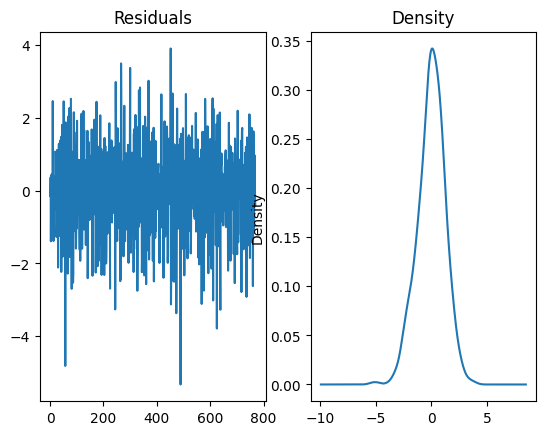

In [ ]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

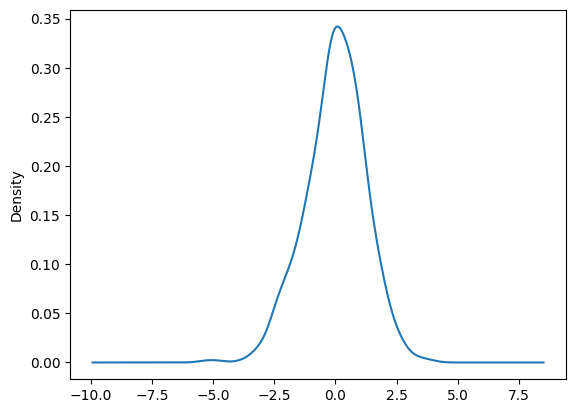

In [ ]:
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
print(residuals.describe())

count    758.000000
mean      -0.002045
std        1.231076
min       -5.324747
25%       -0.764282
50%        0.054145
75%        0.832654
max        3.901094
dtype: float64


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


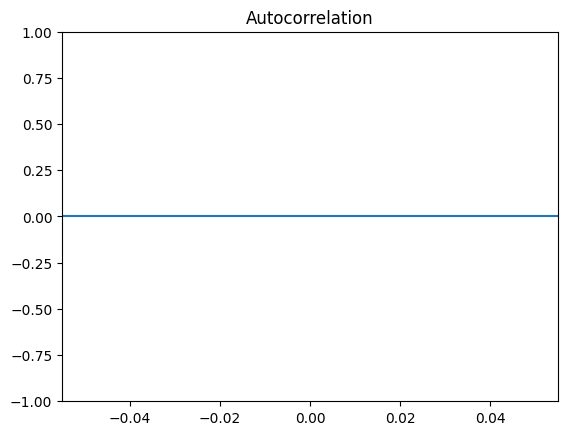

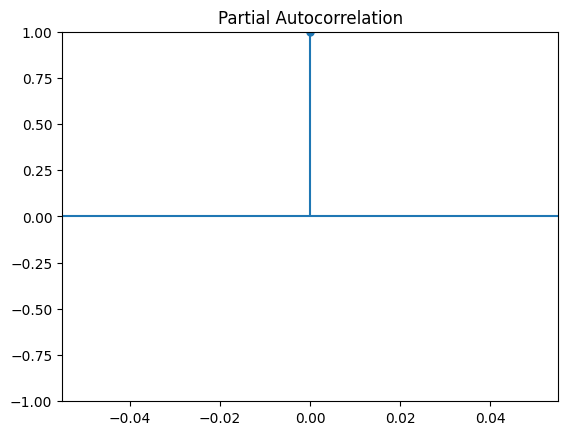

In [ ]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: xlabel='Date'>

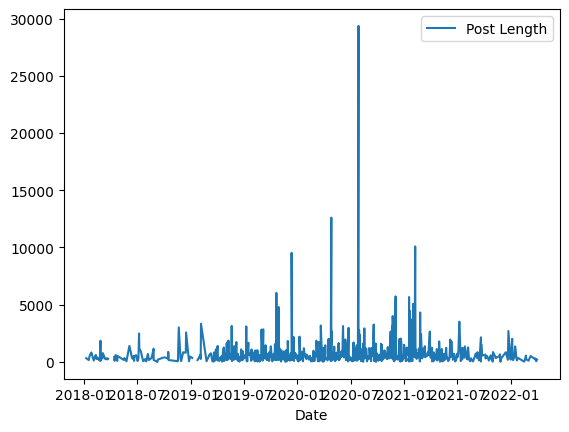

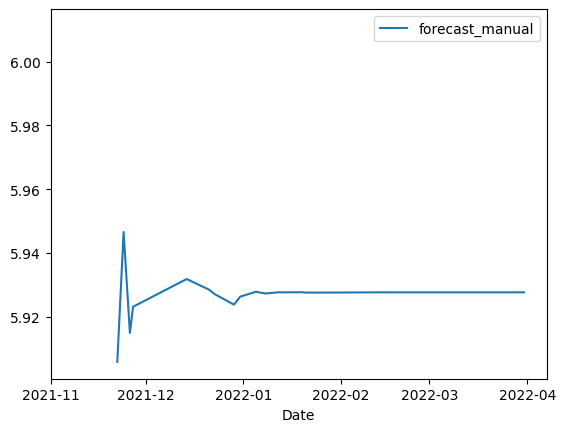

In [ ]:
forecast_test = model_fit.forecast(len(df_test))
dp_arima['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
dp_arima.plot(x = 'Date', y ='Post Length')
dp_arima.plot(x = 'Date', y ='forecast_manual')

<ipython-input-22-eef1d2e5bc2f>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dp_arima.time = pd.to_datetime(dp_arima['Date'], format='%Y-%m-%d')


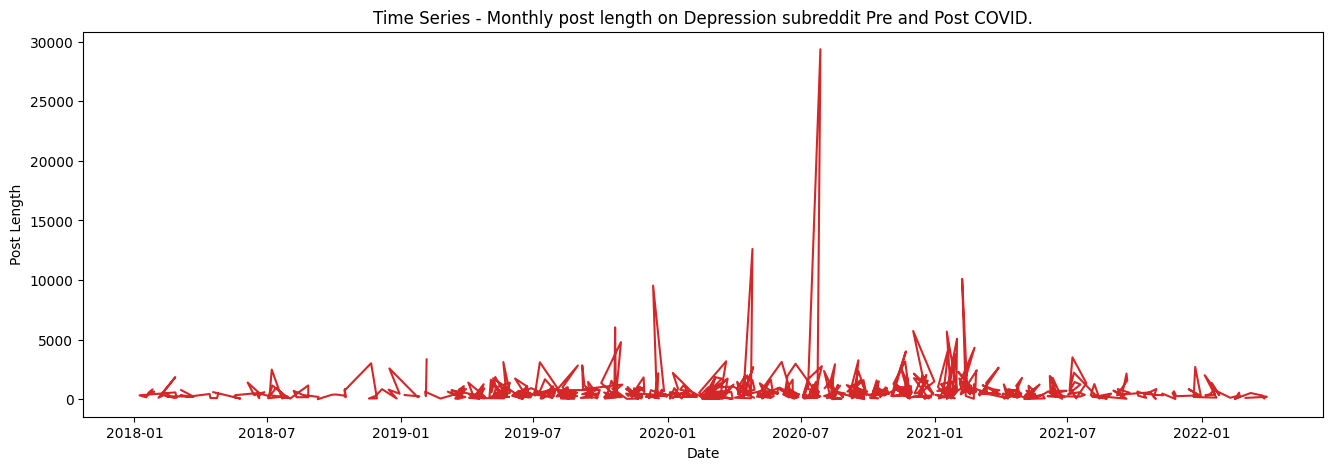

In [ ]:
import matplotlib.pyplot as plt
dp_arima.time = pd.to_datetime(dp_arima['Date'], format='%Y-%m-%d')
dp_arima.set_index(['Date'],inplace=True)


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Post Length', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(dp_arima, x=dp_arima.index, y=dp_arima['Post Length'], title='Time Series - Monthly post length on Depression subreddit Pre and Post COVID.')

In [ ]:
target_column = 'Post Length'  # Adjust accordingly
y_actual = dp_arima[target_column]
y = log_dp_arima

# Handle missing values
y = y.dropna()

In [ ]:
train_size = int(len(log_dp_arima) * 0.8)
train, test = y[:train_size], y[train_size:]

In [ ]:
model = auto_arima(train, trace=True, suppress_warnings=True, seasonal=True)

# Make predictions on the test set
predictions, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2359.802, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2194.814, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2357.802, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2119.204, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2064.494, Time=0.50 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2053.080, Time=0.79 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2040.362, Time=0.70 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2038.365, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2051.081, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1951.101, Time=1.24 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1950.352, T

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


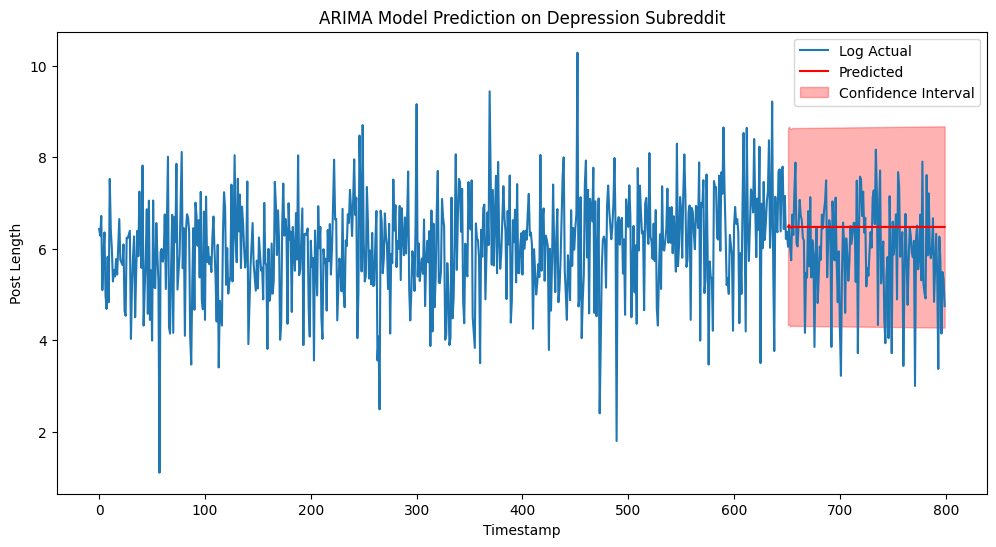

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(y_actual.index, y_actual, label='Actual')
plt.plot(y.index, y, label='Log Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='r', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Model Prediction on Depression Subreddit')
plt.xlabel('Timestamp')
plt.ylabel(target_column)
plt.legend()
plt.show()

In [ ]:
#forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
#dp_arima['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)
#dp_arima

AttributeError: 'function' object has no attribute 'predict'

In [ ]:
#dp_arima['Date'] = pd.to_datetime(dp_arima['Date'])

# Create a new DataFrame with 'Date' as the index
#dp_indexed = dp_arima.set_index('Date')

# Resample the data to monthly frequency while aggregating other columns
#dp_monthly = dp_arima.resample('M').mean()

# Create the ARIMA model
#model = sm.tsa.ARIMA(dp_monthly['Score'], order=(1, 0, 1))
#results = model.fit()

# Predict the next 12 months
#forecast = results.predict(start=len(dp_monthly), end=len(dp_monthly) + 11)

# Print the forecasted values
#print(forecast)

<ipython-input-49-c628a859555e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dp_monthly = dp_arima.resample('M').mean()


2022-04-30    1467.533876
2022-05-31    1494.780168
2022-06-30    1518.057616
2022-07-31    1537.944344
2022-08-31    1554.934263
2022-09-30    1569.449338
2022-10-31    1581.850067
2022-11-30    1592.444439
2022-12-31    1601.495577
2023-01-31    1609.228276
2023-02-28    1615.834589
2023-03-31    1621.478589
Freq: M, Name: predicted_mean, dtype: float64
